In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\Users\Mason\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
df_men_answer = pd.read_csv('./datasets/men_comments.csv')
df_men_question = pd.read_csv('./datasets/men_titles.csv')

In [3]:
df_women_answer = pd.read_csv('./datasets/women_comments.csv')
df_women_question = pd.read_csv('./datasets/women_titles.csv')

In [4]:
men_question_corpus = list(df_men_question['text'])
men_answer_corpus = list(df_men_answer['text'])

In [5]:
women_question_corpus = list(df_women_question['text'])
women_answer_corpus = list(df_women_answer['text'])

In [6]:
sia = SentimentIntensityAnalyzer()

In [7]:
mq_list_of_polarities = [sia.polarity_scores(i) for i in men_question_corpus]
mt_list_of_polarities = [sia.polarity_scores(i) for i in men_answer_corpus]
wq_list_of_polarities = [sia.polarity_scores(i) for i in women_question_corpus]
wt_list_of_polarities = [sia.polarity_scores(i) for i in women_answer_corpus]

In [8]:
df_men_question['negative'] = [i['neg'] for i in mq_list_of_polarities]
df_men_question['neutral'] = [i['neu'] for i in mq_list_of_polarities]
df_men_question['positive'] = [i['pos'] for i in mq_list_of_polarities]

In [9]:
df_men_answer['negative'] = [i['neg'] for i in mt_list_of_polarities]
df_men_answer['neutral'] = [i['neu'] for i in mt_list_of_polarities]
df_men_answer['positive'] = [i['pos'] for i in mt_list_of_polarities]

In [10]:
df_women_question['negative'] = [i['neg'] for i in wq_list_of_polarities]
df_women_question['neutral'] = [i['neu'] for i in wq_list_of_polarities]
df_women_question['positive'] = [i['pos'] for i in wq_list_of_polarities]

In [11]:
df_women_answer['negative'] = [i['neg'] for i in wt_list_of_polarities]
df_women_answer['neutral'] = [i['neu'] for i in wt_list_of_polarities]
df_women_answer['positive'] = [i['pos'] for i in wt_list_of_polarities]

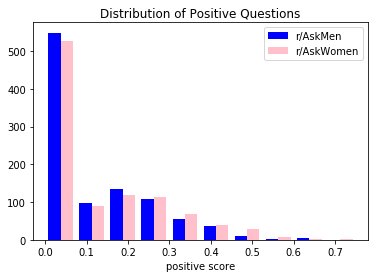

In [12]:
plt.hist([df_men_question['positive'], df_women_question['positive']], color = ['blue', 'pink'], label=['r/AskMen', 'r/AskWomen'])

plt.legend()
plt.xlabel('positive score')
plt.title('Distribution of Positive Questions')

plt.savefig('./images/positive_questions');

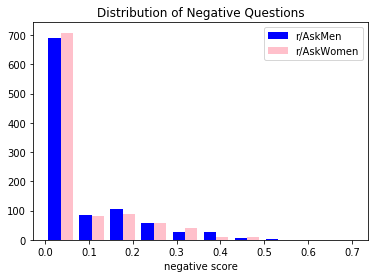

In [13]:
plt.hist([df_men_question['negative'], df_women_question['negative']], color = ['blue', 'pink'], label=['r/AskMen', 'r/AskWomen'])

plt.legend()
plt.xlabel('negative score')
plt.title('Distribution of Negative Questions')

plt.savefig('./images/negative_questions');

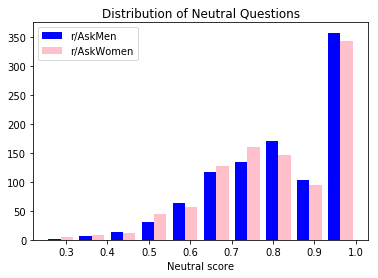

In [14]:
plt.hist([df_men_question['neutral'], df_women_question['neutral']], color = ['blue', 'pink'], label=['r/AskMen', 'r/AskWomen'])

plt.legend()
plt.xlabel('Neutral score')
plt.title('Distribution of Neutral Questions')

plt.savefig('./images/neutral_questions');

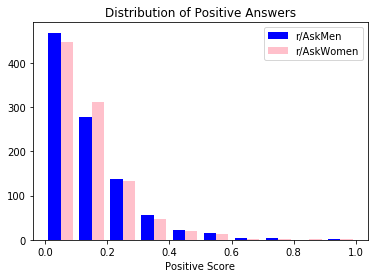

In [15]:
plt.hist([df_men_answer['positive'], df_women_answer['positive']], color = ['blue', 'pink'], label=['r/AskMen', 'r/AskWomen'])

plt.legend()
plt.xlabel('Positive Score')
plt.title('Distribution of Positive Answers')

plt.savefig('./images/positive_answers');

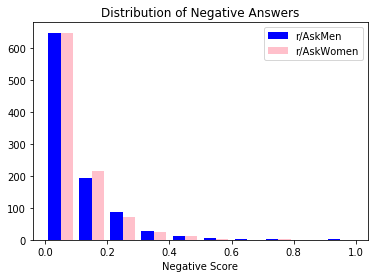

In [16]:
plt.hist([df_men_answer['negative'], df_women_answer['negative']], color = ['blue', 'pink'], label=['r/AskMen', 'r/AskWomen'])

plt.legend()
plt.xlabel('Negative Score')
plt.title('Distribution of Negative Answers')
plt.savefig('./images/negative_answers');

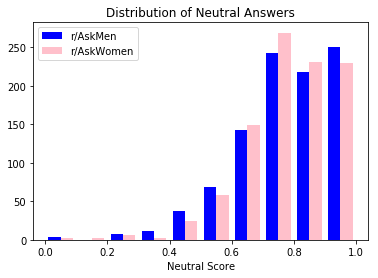

In [17]:
plt.hist([df_men_answer['neutral'], df_women_answer['neutral']], color = ['blue', 'pink'], label=['r/AskMen', 'r/AskWomen'])

plt.legend()
plt.xlabel('Neutral Score')
plt.title('Distribution of Neutral Answers')

plt.savefig('./images/neutral_answers');

In [18]:
cv_question_men = CountVectorizer(stop_words='english')
question_men_text = cv_question_men.fit_transform(men_question_corpus)
df_question_men_cv = pd.DataFrame(question_men_text.toarray(), columns=cv_question_men.get_feature_names())

In [19]:
df_question_men_cv.sum().sort_values(ascending=False).head(20)

men             195
did             103
like             67
girl             64
reddit           64
guys             64
thing            48
women            48
feel             44
ve               44
best             40
sex              39
does             38
relationship     37
think            36
make             34
woman            32
want             31
dating           31
date             29
dtype: int64

In [21]:
cv_answer_men = CountVectorizer(stop_words='english')
answer_men_text = cv_answer_men.fit_transform(men_answer_corpus)
df_answer_men_cv = pd.DataFrame(answer_men_text.toarray(), columns=cv_answer_men.get_feature_names())

In [22]:
df_answer_men_cv.sum().sort_values(ascending=False).head(20)

just      295
like      251
don       212
time      177
good      135
people    127
want      119
ve        119
things    109
make      109
know      107
really    104
think     100
life       93
way        93
going      87
ll         84
work       78
got        73
love       72
dtype: int64

In [23]:
cv_question_women = CountVectorizer(stop_words='english')
women_question_text = cv_question_women.fit_transform(women_question_corpus)
df_question_women_cv = pd.DataFrame(women_question_text.toarray(), columns=cv_question_women.get_feature_names())

In [24]:
df_question_women_cv.sum().sort_values(ascending=False).head(20)

did             162
women           138
ladies           52
like             49
life             48
favorite         47
ve               46
feel             45
time             44
relationship     39
people           38
reddit           36
think            36
work             33
best             31
thing            31
experience       28
good             26
love             25
things           25
dtype: int64

In [25]:
cv_answer_women = CountVectorizer(stop_words='english')
women_answer_text = cv_answer_women.fit_transform(women_answer_corpus)
df_answer_women_cv = pd.DataFrame(women_answer_text.toarray(), columns=cv_answer_women.get_feature_names())

In [26]:
df_answer_women_cv.sum().sort_values(ascending=False).head(20)

like       302
just       270
don        227
time       199
people     196
really     140
ve         139
things     127
think      125
know       124
feel       108
good       107
make       107
day        105
life       104
got        101
want        96
didn        94
years       90
friends     89
dtype: int64

In [27]:
print(df_question_men_cv['sex'].sum())

print(df_answer_men_cv['sex'].sum())

print(df_question_women_cv['sex'].sum())

print(df_answer_women_cv['sex'].sum())

39
60
17
43


In [28]:
print(df_question_men_cv['love'].sum())

print(df_answer_men_cv['love'].sum())

print(df_question_women_cv['love'].sum())

print(df_answer_women_cv['love'].sum())

26
72
25
85
